In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From video... https://www.youtube.com/watch?v=QX1-xGVFqmw <br>
Fourier transform does not capture abrupt changes in data efficiently.  <br>
Fourier uses sine waves over long periods of time <br>
Wavelets have mean zero and occur at a localized, finite, duration. <br>
Here are some examples: <br>
<img src='wavelet examples.png' width="800">
Important concepts: <br>
Scaling: stretching or shrinking the wavelet in time <br>
Shifting: moving the wavelet along the length of the signal <br>


### Example

/Users/cjstev/anaconda/lib/python2.7/site-packages/scipy/signal/waveforms.py:236: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t == 'cutoff':  # compute cut_off point


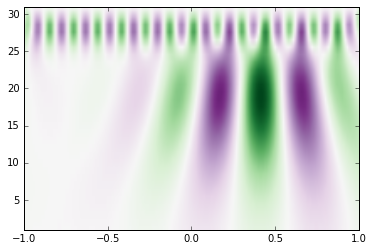

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

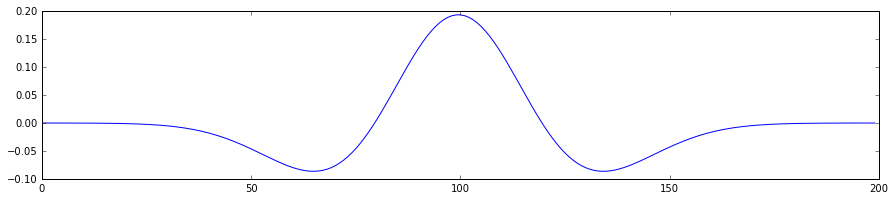

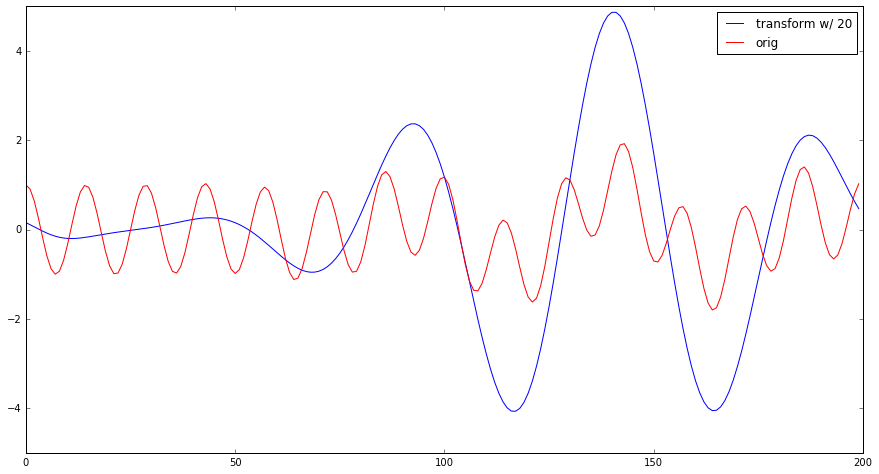

In [3]:
plt.figure(figsize=(15,3))
plt.plot(signal.ricker(200,20))
plt.show()
plt.figure(figsize=(15,8))
plt.plot(cwtmatr[10], color='b', label = 'transform w/ 20')
plt.plot(sig, color='r', label = 'orig')
plt.legend()
plt.show()

### Do this on Traffic

In [4]:
df = pd.read_csv('2015_station_days_with_meta.csv', usecols=range(1,20))
df = df.ix[df['Partition'] == 'Weekdays']
flow_df = df.pivot(index='Station', columns='Time', values='Flow')

/Users/cjstev/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
a = flow_df[flow_df.index==1108148]
a = np.array(a.transpose())
a = np.concatenate(a)

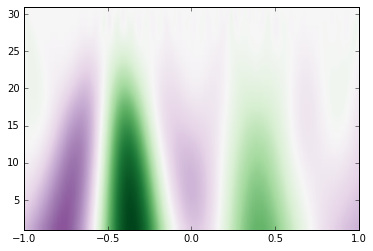

In [6]:
widths = np.arange(1, 31, 1)
cwtmatr = signal.cwt(a, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

### A short wavelet scale

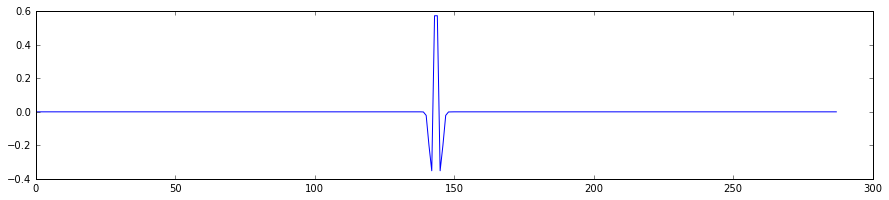

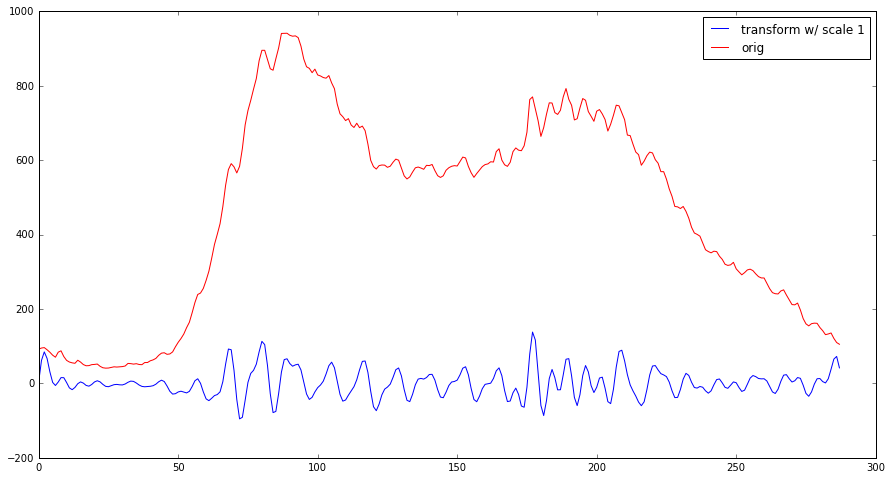

In [7]:
width = 1
plt.figure(figsize=(15,3))
plt.plot(signal.ricker(288,width))
plt.show()
plt.figure(figsize=(15,8))
plt.plot(cwtmatr[width], color='b', label = 'transform w/ scale {}'.format(str(width)))
plt.plot(a, color='r', label = 'orig')
#plt.plot(a-cwtmatr[width], color='g', label = 'smoothed')
plt.legend()
plt.show()

Using a small scale wavelet, the wiggles are localized and exposed for a given station.

### A larger wavelet scale

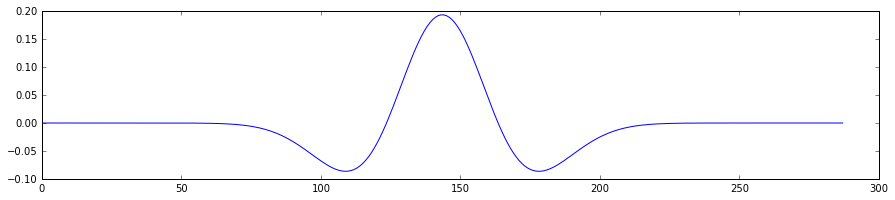

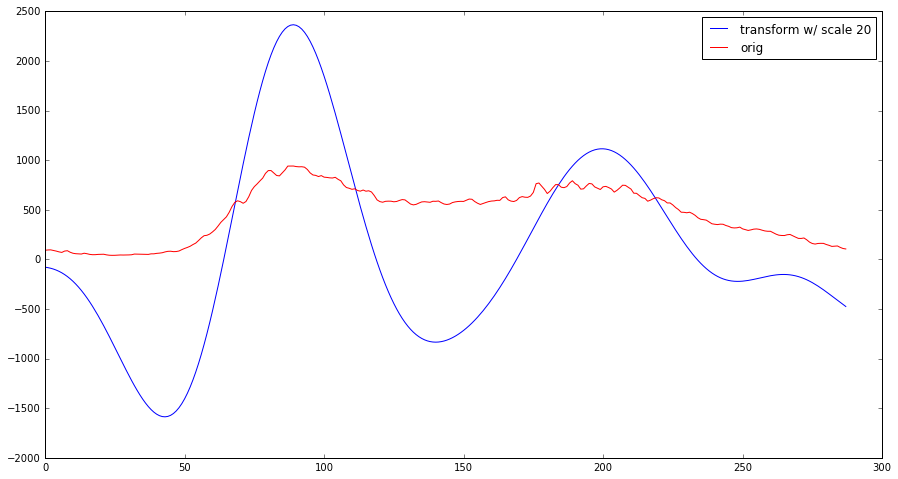

In [8]:
width = 20
plt.figure(figsize=(15,3))
plt.plot(signal.ricker(288,width))
plt.show()
plt.figure(figsize=(15,8))
plt.plot(cwtmatr[width], color='b', label = 'transform w/ scale {}'.format(str(width)))
plt.plot(a, color='r', label = 'orig')
plt.legend()
plt.show()

Alternatively, if we use a large scale wavelet, the general pattern in the data is exagerated.  

### Many wavelet scales

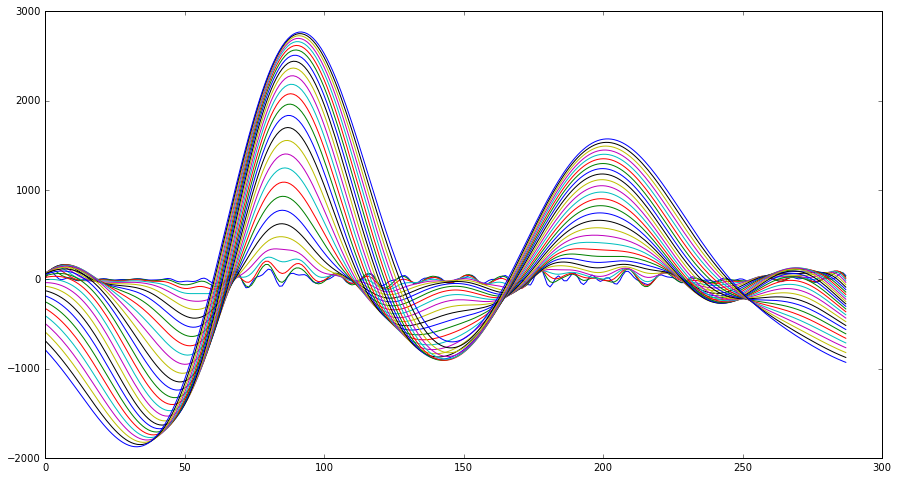

In [9]:
plt.figure(figsize=(15,8))
for width in range(1,30):
    plt.plot(cwtmatr[width], label = 'transform w/ scale {}'.format(str(width)))
plt.show()